In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
train = pd.read_csv("train.csv")
formula_train = pd.read_csv("formula_train.csv")

print(f"Train dataset shape: {train.shape}")
print(f"Train_formula dataset shape: {formula_train.shape}")

Train dataset shape: (17010, 82)
Train_formula dataset shape: (17010, 88)


In [37]:
test = pd.read_csv("test.csv")
formula_test = pd.read_csv("formula_test.csv")

print(f"Test dataset shape: {test.shape}")
print(f"Test_formula dataset shape: {formula_test.shape}")

Test dataset shape: (4253, 81)
Test_formula dataset shape: (4253, 87)


Wall time: 33.1 s


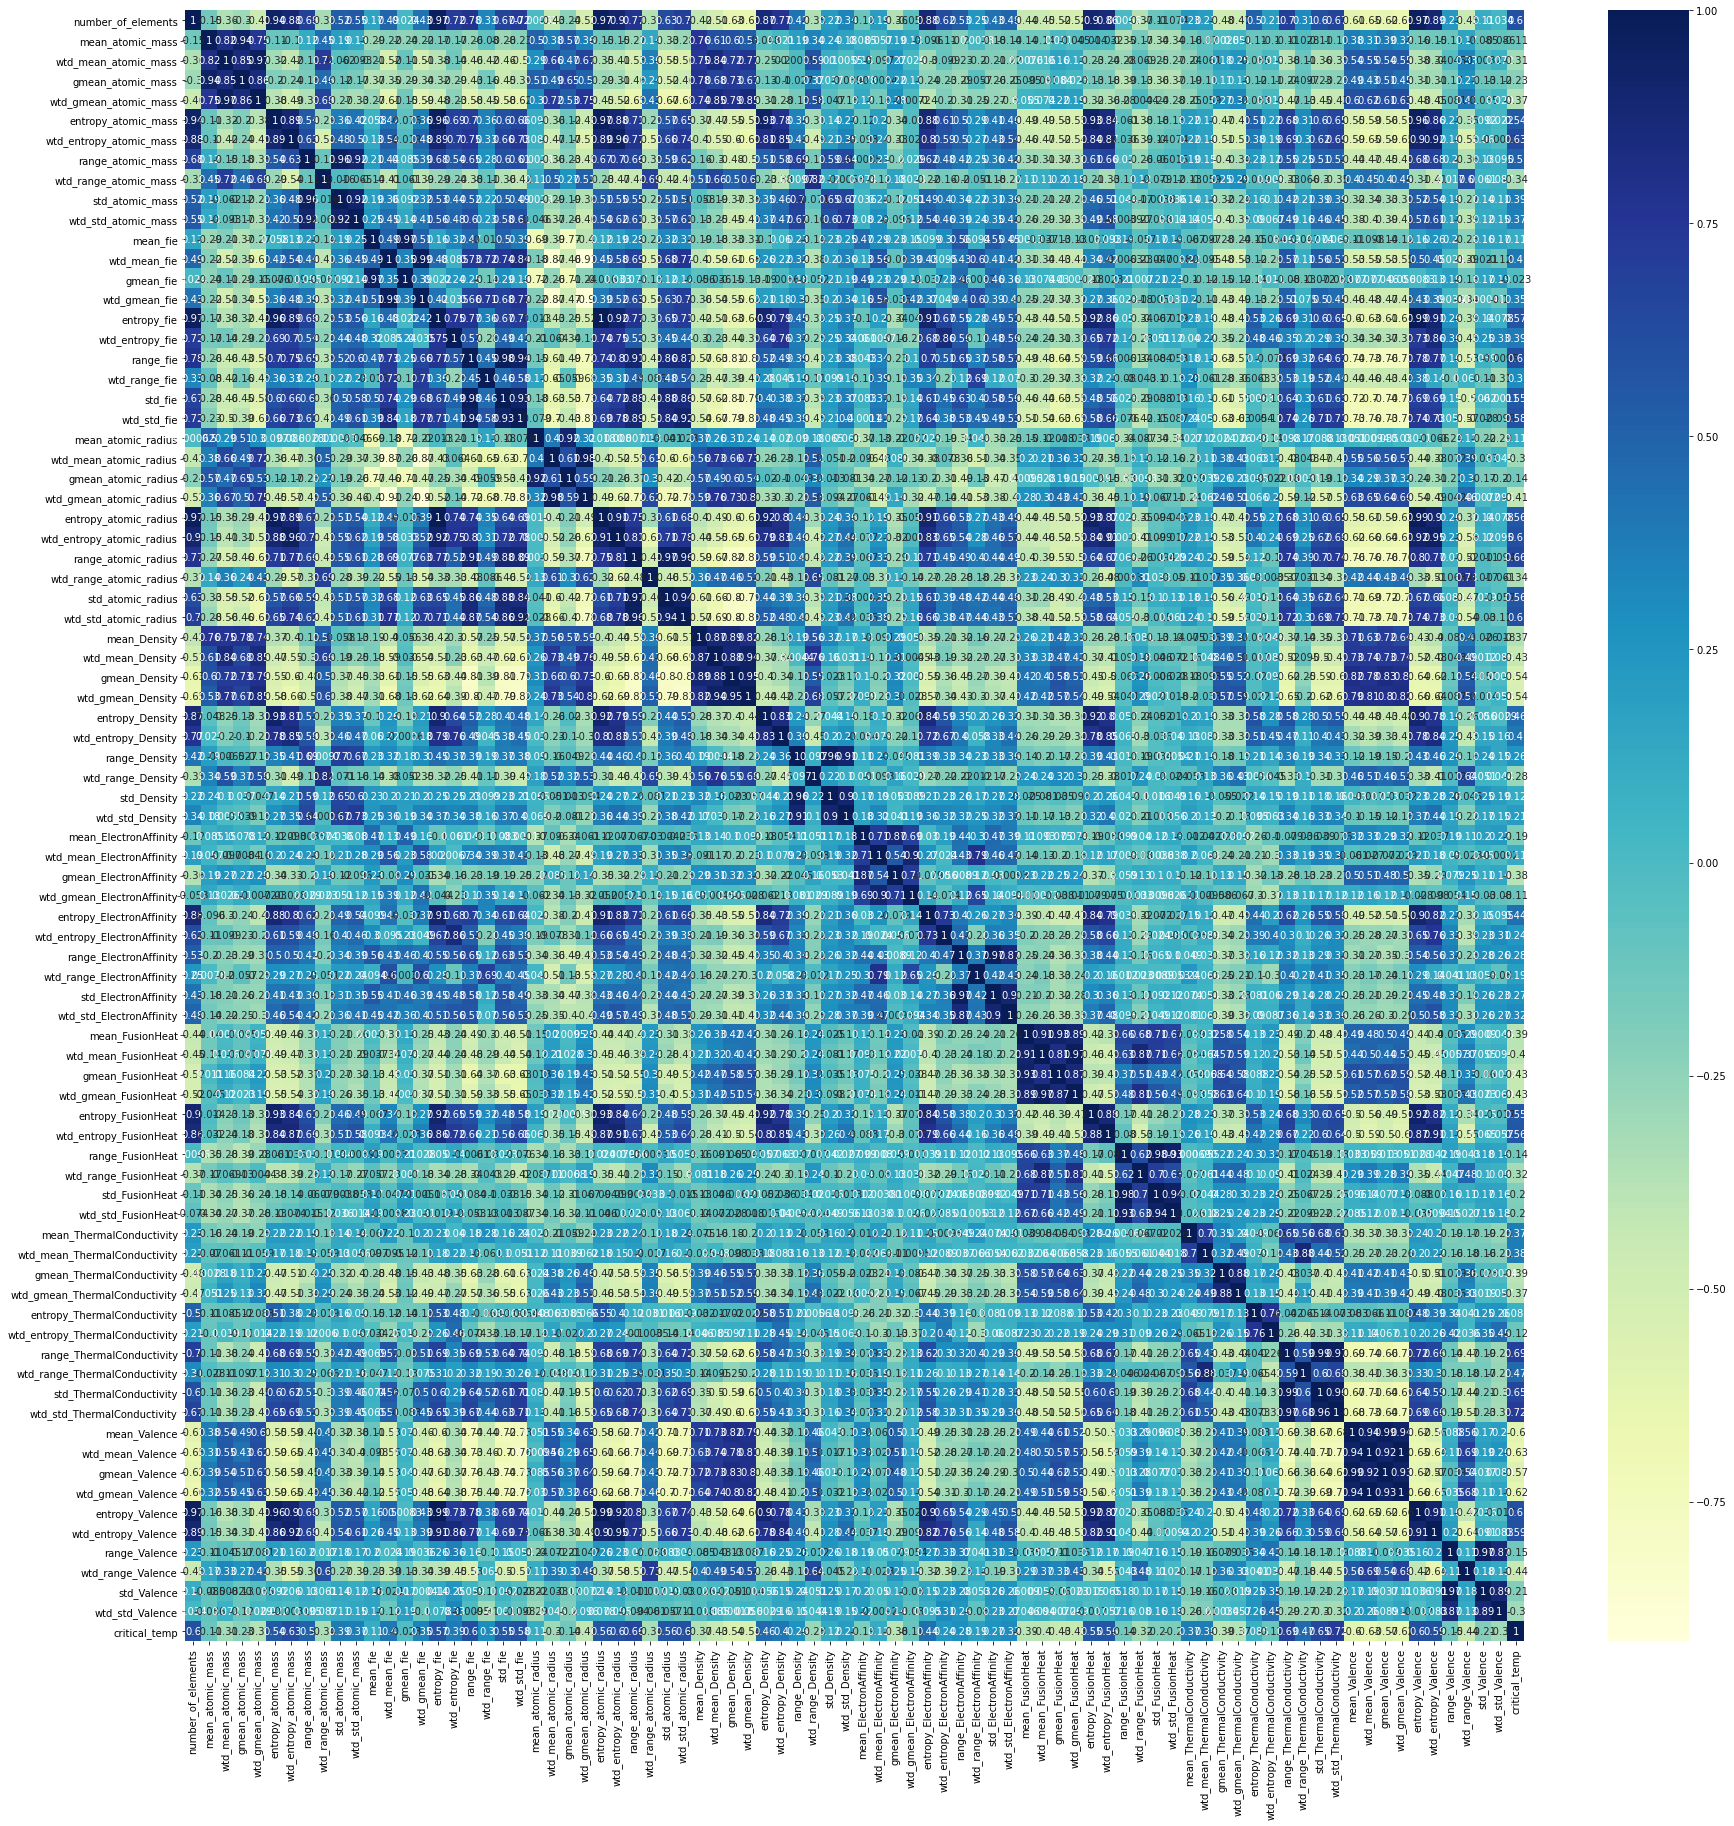

In [4]:
%%time

plt.figure(figsize = (30,30))

sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

results_path = 'results.png'
plt.savefig(results_path)

In [38]:
formula_train = formula_train.drop(columns=['critical_temp'])

train_full = pd.concat([train, formula_train], axis=1)

print(f"Full Train dataset shape: {train_full.shape}")

Full Train dataset shape: (17010, 169)


In [39]:
train_full.drop(columns=['material'], inplace=True)

In [40]:
X = train_full.drop(columns=['critical_temp'])
y = train_full['critical_temp']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (17010, 167)
Target shape: (17010,)


In [41]:
test_full = pd.concat([test, formula_test], axis=1)

print(f"Full Test dataset shape: {test_full.shape}")

Full Test dataset shape: (4253, 168)


In [42]:
test_full.drop(columns=['material'], inplace=True)

In [43]:
len(set(test_full.columns) & set(train_full.columns))

167

In [44]:
test.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,5,92.729214,61.051113,73.132787,37.513930,1.449309,1.146919,122.90607,35.741099,47.094633,...,2.00,2.200000,1.888175,2.124829,1.557113,1.053346,2,1.114286,0.632456,0.550325
1,4,64.632218,55.790060,48.775792,35.178830,1.139875,0.931491,122.90607,35.851917,46.059083,...,2.25,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
2,4,76.444563,65.834647,59.356672,48.955994,1.199541,1.241867,121.32760,22.132267,43.823354,...,2.25,2.133333,2.213364,2.111100,1.368922,1.354710,1,0.266667,0.433013,0.339935
3,4,96.032850,77.279467,69.515930,53.611120,1.159784,1.267452,151.25960,22.543367,59.663892,...,2.25,2.166667,2.213364,2.139826,1.368922,1.351681,1,0.333333,0.433013,0.372678
4,4,96.451653,75.978308,69.689342,53.146925,1.158346,1.259726,152.93481,24.421050,60.166149,...,2.25,2.116667,2.213364,2.096882,1.368922,1.350047,1,0.316667,0.433013,0.321023


In [45]:
X = train.drop(columns=['critical_temp'])
y = train['critical_temp']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (17010, 81)
Target shape: (17010,)


In [46]:
X.shape

(17010, 81)

In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = StandardScaler()
X_std = std.fit_transform(X)
# std.fit(X)
# X_std = std.transform(X)

mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(X)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.15, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (14458, 81), (14458,)
Train dataset size: (2552, 81), (2552,)


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.15, random_state=42)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('r2_score:', r2_score(y, y_pred))

Train dataset size: (14458, 81), (14458,)
Train dataset size: (2552, 81), (2552,)
Mean Absolute Error: 13.294945687543553
Mean Squared Error: 307.7301748653558
r2_score: 0.7389481688839085


In [51]:
features = X.columns

In [52]:
coeff_df = pd.DataFrame(model.coef_, columns=['Coefficient'])  
coeff_df['features'] = features

coeff_df.sort_values(by='Coefficient')

,Coefficient,features
15,-115.737788,entropy_fie
76,-72.628918,wtd_entropy_Valence
5,-34.236296,entropy_atomic_mass
74,-29.545704,wtd_gmean_Valence
80,-26.456219,wtd_std_Valence
...,...,...
72,25.170008,wtd_mean_Valence
16,45.237762,wtd_entropy_fie
26,50.378731,wtd_entropy_atomic_radius
25,63.366952,entropy_atomic_radius


In [53]:
cols_drop = list(coeff_df[(coeff_df['Coefficient'] > -1) & (coeff_df['Coefficient'] < 1)]['features'])

In [54]:
X = X.drop(columns=cols_drop)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

std = StandardScaler()
X_std = std.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.15, random_state=123)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('r2_score:', r2_score(y_test, y_pred))

Train dataset size: (14458, 31), (14458,)
Train dataset size: (2552, 31), (2552,)
Mean Absolute Error: 16.127728001931853
Mean Squared Error: 418.9660891547968
r2_score: 0.6355998215896455


In [56]:
test_full = test_full.drop(columns=cols_drop)

In [57]:
test.shape

(4253, 81)

In [58]:
X_test_std = std.transform(test_full)

ValueError: X has 117 features, but this StandardScaler is expecting 31 features as input.

In [59]:
test_full.shape

(4253, 117)

In [60]:
y_pred_test = model.predict(test_full)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 31 is different from 117)

In [61]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['critical_temp'])
y_pred_test = y_pred_test.reset_index()

y_pred_test.to_csv("solution.csv", index=False)

files.download("solution.csv")

NameError: name 'y_pred_test' is not defined